In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mypath= r"C:\Users\conno\Documents\Data_Projects\FB AWS data"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [2]:
onlyfiles

['fb2020-02-19.csv',
 'fb2020-02-20.csv',
 'fb2020-02-21.csv',
 'fb2020-02-24.csv',
 'fb2020-02-25.csv',
 'fb2020-02-26.csv',
 'fb2020-02-27.csv',
 'fb2020-02-28.csv',
 'fb2020-03-02.csv',
 'fb2020-03-03.csv',
 'fb2020-03-04.csv',
 'fb2020-03-05.csv',
 'fb2020-03-06.csv',
 'fb2020-03-09.csv',
 'fb2020-03-10.csv',
 'fb2020-03-11.csv',
 'fb2020-03-12.csv',
 'fb2020-03-13.csv',
 'fb2020-03-16.csv',
 'fb2020-03-17.csv',
 'fb2020-03-18.csv',
 'fb2020-03-19.csv',
 'fb2020-03-20.csv',
 'fb2020-03-23.csv',
 'fb2020-03-24.csv',
 'fb2020-03-25.csv',
 'fb2020-03-26.csv',
 'fb2020-03-27.csv']

In [3]:
days_used = 3
data_list=[]

for i in range(days_used,len(onlyfiles)):
    data_list_inner=[]
    #if j<=i:
    for j in range(1,days_used+1):
        data_list_inner.append(pd.read_csv(join(mypath, onlyfiles[i-j])))
    #else:
       #pass
    if len(data_list_inner)!=0:
        data_list.append(data_list_inner)
    else:
        pass


In [4]:
data_list

[[    symbol   lastSaleTime  lastSalePrice  volume
  0       FB  1582295402269         213.57    1724
  1       FB  1582295455757         213.78    3557
  2       FB  1582295510493         213.58    4966
  3       FB  1582295582383         213.90    5369
  4       FB  1582295631929         214.04    6325
  ..     ...            ...            ...     ...
  386     FB  1582318658358         210.11  333367
  387     FB  1582318709397         210.04  335534
  388     FB  1582318778993         210.12  341603
  389     FB  1582318797546         210.17  342064
  390     FB  1582318797546         210.17  342064
  
  [391 rows x 4 columns],     symbol   lastSaleTime  lastSalePrice  volume
  0       FB  1582209001454        216.790     395
  1       FB  1582209060050        217.620    1590
  2       FB  1582209114999        218.020    2660
  3       FB  1582209182373        217.870    2760
  4       FB  1582209233780        217.860    3467
  ..     ...            ...            ...     ...
  38

In [5]:
max_list=[]
for j in range(len(data_list)):
    max_list_inner=[]
    for i in range(len(data_list[j])):
        max_list_inner.append(data_list[j][i]['lastSalePrice'].max())
    max_list.append(np.max(max_list_inner))
        


In [6]:
max_list

[218.75,
 218.75,
 214.04,
 203.54,
 203.19,
 201.155,
 196.44,
 196.79,
 196.79,
 196.79,
 191.81,
 188.71,
 182.46,
 178.27,
 178.27,
 173.41,
 170.28,
 170.28,
 158.87,
 159.75,
 159.75,
 159.75,
 161.23,
 162.925,
 163.75]

In [7]:
min_list=[]
for j in range(len(data_list)):
    min_list_inner=[]
    for i in range(len(data_list[j])):
        min_list_inner.append(data_list[j][i]['lastSalePrice'].min())
    min_list.append(np.min(min_list_inner))

In [8]:
min_list

[208.88,
 198.24,
 196.055,
 195.51,
 189.8,
 182.31,
 182.31,
 182.31,
 185.95,
 183.99,
 176.38,
 168.59,
 168.59,
 167.82,
 154.51,
 154.51,
 143.8,
 143.8,
 137.24,
 137.24,
 137.24,
 142.91,
 142.91,
 142.91,
 153.28]

In [9]:
avg_list=[]
for j in range(len(data_list)):
    avg_list_inner=[]
    for i in range(len(data_list[j])):
        avg_list_inner.append(data_list[j][i]['lastSalePrice'].mean())
    avg_list.append(np.mean(avg_list_inner))

In [10]:
avg_list

[214.5791773231032,
 208.8818115942029,
 203.68592924126168,
 199.62253196930942,
 197.13916453537936,
 193.03879369138966,
 190.7725618073317,
 190.25513213981245,
 190.6392924126172,
 188.83696504688842,
 184.68141943734034,
 178.79904518329081,
 174.82138107416884,
 172.08885336743387,
 168.109590792839,
 164.29573742540495,
 157.9333290707588,
 154.4407843137253,
 147.74257885762987,
 149.1903367433929,
 150.49630008525153,
 151.9862063086106,
 152.52289428815047,
 154.4018712702475,
 158.9775191815859]

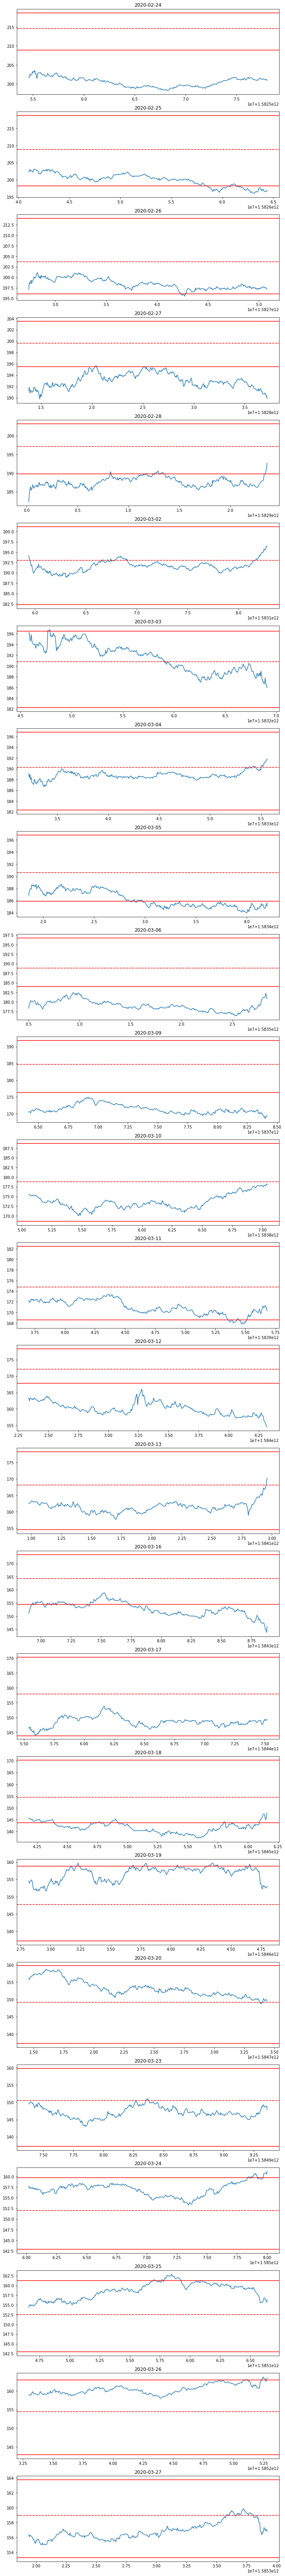

In [11]:
plot_files=onlyfiles[days_used:]

plt.figure(figsize=(12,120))
for i in range(len(plot_files)):
    df=pd.read_csv(join(mypath, plot_files[i]))
    xplot=df['lastSaleTime']
    yplot=df['lastSalePrice']
    maxval = max_list[i]
    minval = min_list[i]
    middle=avg_list[i]
    #middle=np.mean([maxval,minval])
    plt.subplot(len(plot_files),1,i+1)
    plt.plot(xplot,yplot)
    plt.axhline(y=maxval, color='r', linestyle='-')
    plt.axhline(y=minval, color='r', linestyle='-')
    plt.axhline(y=middle, color='r', linestyle='--')
    plt.title(str(plot_files[i][2:-4]))